In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data, removing leading and trailing spaces and dropping duplicates
df = pd.read_csv('/Users/sarahnguyen/Downloads/music.csv').iloc[:,1:]
df.columns = df.columns.str.strip()
df = df.drop_duplicates()

# Drop rows where genres are based on language and not audio features
language_genres = ['british','french','german','swedish','spanish','indian','malay','turkish','world-music']
df = df.drop(df[df['track_genre'].isin(language_genres)].index)

# Convert booleans to integers
df['explicit'] = df['explicit'].astype(int)

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111995,3TpcGANz2N705Bq4zc982H,Roots Manuva,Run Come Save Me,Trim Body,17,215720,1,0.798,0.6840,2,-5.138,1,0.1680,0.03070,0.000159,0.4790,0.557,94.936,4,trip-hop
111996,57qWtXga1hMwSfkhLDJCKQ,Everything But The Girl,Worldwide (Deluxe Edition),My Head Is My Only House Unless It Rains - 201...,18,178586,0,0.590,0.1200,5,-12.451,1,0.0374,0.89900,0.000023,0.1090,0.369,107.099,4,trip-hop
111997,0xcDUsknTawAv5VZKQ62aZ,Wax Tailor,Dusty Rainbow from the Dark,From The Dark,17,202960,0,0.460,0.2920,11,-11.922,1,0.0281,0.37300,0.229000,0.1700,0.357,158.906,3,trip-hop
111998,7LVOum3l1HrbitK9AoUPd7,Cibo Matto,Hotel Valentine,Emerald Tuesday,17,199893,0,0.554,0.8980,0,-7.642,1,0.0474,0.00732,0.833000,0.4780,0.853,113.289,1,trip-hop


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Scale numeric audio features
numeric_features = ['popularity','duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.044043,0,0.686294,0.4610,1,0.791392,0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.028566,0,0.426396,0.1660,1,0.597377,1,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.040255,0,0.444670,0.3590,0,0.736123,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.038557,0,0.270051,0.0596,0,0.573701,1,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.037969,0,0.627411,0.4430,2,0.737103,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111995,3TpcGANz2N705Bq4zc982H,Roots Manuva,Run Come Save Me,Trim Body,0.17,0.041189,1,0.810152,0.6840,2,0.821135,1,0.174093,0.030823,0.000159,0.4790,0.559799,0.390086,4,trip-hop
111996,57qWtXga1hMwSfkhLDJCKQ,Everything But The Girl,Worldwide (Deluxe Edition),My Head Is My Only House Unless It Rains - 201...,0.18,0.034099,0,0.598985,0.1200,5,0.685866,1,0.038756,0.902610,0.000023,0.1090,0.370854,0.440063,4,trip-hop
111997,0xcDUsknTawAv5VZKQ62aZ,Wax Tailor,Dusty Rainbow from the Dark,From The Dark,0.17,0.038753,0,0.467005,0.2920,11,0.695651,1,0.029119,0.374498,0.229000,0.1700,0.358794,0.652935,3,trip-hop
111998,7LVOum3l1HrbitK9AoUPd7,Cibo Matto,Hotel Valentine,Emerald Tuesday,0.17,0.038167,0,0.562437,0.8980,0,0.774818,1,0.049119,0.007349,0.833000,0.4780,0.857286,0.465497,1,trip-hop


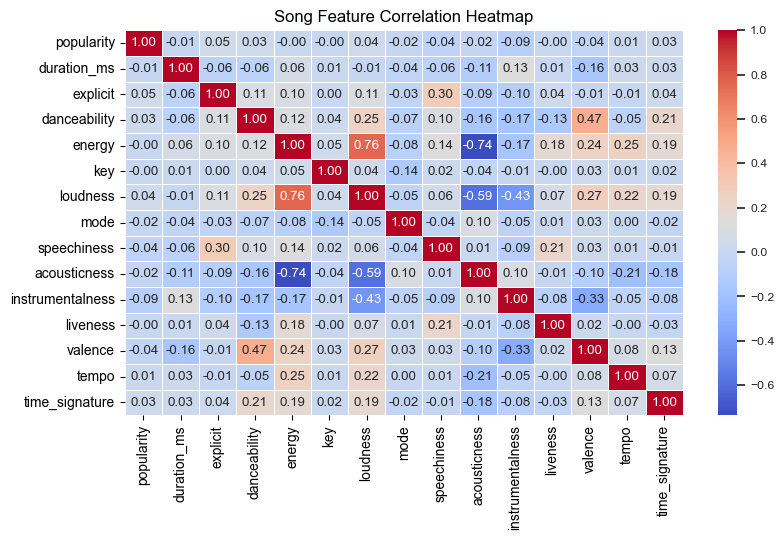

In [4]:
# Build numeric dataframe to analyze correlation between song features
numeric_df = numeric_df = df.select_dtypes(include='number')

# Visualization
plt.figure(figsize=(9, 5))
plt.title("Song Feature Correlation Heatmap")
sns.set(font_scale=0.8)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, linewidths=.5, cmap='coolwarm', fmt=".2f")
plt.show()


In [5]:
# Create a dataframe with the average values of each feature for each genre
average_df = df.groupby('track_name')[numeric_df.columns].mean().reset_index()
average_df

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"""A"" You're Adorable",0.39,0.028962,0.0,0.624365,0.3750,0.0,0.724507,0.0,0.033057,0.483936,0.000000,0.1110,0.926633,0.454941,4.0
1,"""C"" IS FOR COOKIE",0.32,0.016097,0.0,0.561421,0.8120,3.0,0.813662,1.0,0.057824,0.132530,0.000010,0.0794,0.875377,0.486367,4.0
2,"""C"" is for Cookie",0.08,0.016550,0.0,0.674112,0.6110,3.0,0.755489,1.0,0.091813,0.120482,0.000000,0.0408,0.761809,0.486675,4.0
3,"""Christe, Redemptor omnium""",0.00,0.055207,0.0,0.112690,0.0568,10.0,0.397277,1.0,0.057098,0.993976,0.697000,0.1100,0.039698,0.696058,1.0
4,"""Contemplate This on the Tree of Woe.""",0.24,0.034504,0.0,0.573604,0.9770,11.0,0.849731,1.0,0.056580,0.028313,0.001320,0.4330,0.388945,0.437511,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67739,내 맘을 볼 수 있나요,0.63,0.043111,0.0,0.403046,0.1660,9.0,0.718662,1.0,0.036166,0.887550,0.000000,0.1000,0.131658,0.553507,4.0
67740,시작,0.65,0.038654,0.0,0.600000,0.8180,4.0,0.850841,1.0,0.075648,0.172691,0.000000,0.1260,0.576884,0.444205,4.0
67741,약속 (Piano Solo),0.37,0.027597,0.0,0.511675,0.1430,1.0,0.570039,1.0,0.072642,0.983936,0.922000,0.1240,0.058693,0.611352,4.0
67742,원펀맨 Theme - Sad Theme,0.37,0.043534,0.0,0.550254,0.3370,2.0,0.618593,1.0,0.055855,0.988956,0.933000,0.1470,0.445226,0.657228,4.0
